# Machine Learning

Within artificial intelligence (AI) and machine learning, there are two basic approaches: **supervised learning** and **unsupervised learning**. The main difference is one uses labeled data to help predict outcomes, while the other does not. However, there are some nuances between the two approaches, and key areas in which one outperforms the other. We will clarify the differences in order to choose the best approach for each situation.

## Supervised learning.

Supervised learning is a machine learning approach that´s defined by it´s used of labeled datasets. These datasets are designed to train or "supervise" algorithms into classifying data or predicting outcomes accurately. Using labeled inputs and outputs, the model can measure it´s accuracy and learn over time.

Supervised learning can be separated into two types of problems when data mining: classification and regression. Fundamentally, classification is about predicting a label and regression is about predicting a quantity:

 * **Classification** problems use an algorithm to accurately assign test data into specific categories (discrete), such as separating apples from oranges, or spam from not spam. *Classification predictive modeling is the task of approximating a mapping function (f) from input variables (X) to discrete output variables (y)*
 
 
 * **Regression** is another type of supervised method that uses an algorithm to understand the relationship between dependent and independent variables. Regression models are helpful for predicting numerical values based on different data points, such as sales revenue projection for a given business. Some popular regression algorithms are linear regression, logistic regresion and polynomial regression. *Regression predictive modeling is the task of approximating a mapping function (f) from input variables (X) to a continuous output variable (y).*
 

## Unsupervised learning.

Unsupervised learning uses machine learning algorithms to analyze and cluster unlabeled data sets. These algorithms discover hidden patterns in data without the need for human intervention (hence, they are "unsupervised").

Unsupervised learning models are used for three main tasks: clustering, association and dimensionality reduction:

* **Clustering** is a data mining technique for grouping unlabeled data based on their similarities or differences. For example, K-means clustering algorithms assign similar data points into groups, where the K value represents the size of the grouping and granularity. This technique is helpful for market segmentation, image compression, etc.   


* **Association** is another type of unsupervised learning method that uses different rules to find relationships between variables in a given dataset. These methods are frequently used for market basket analysis and recommendation engines, along the lines of “Customers Who Bought This Item Also Bought” recommendations.   


* **Dimensionality reduction** is a learning technique used when the number of features  (or dimensions) in a given dataset is too high. It reduces the number of data inputs to a manageable size while also preserving the data integrity. Often, this technique is used in the preprocessing data stage, such as when autoencoders remove noise from visual data to improve picture quality.


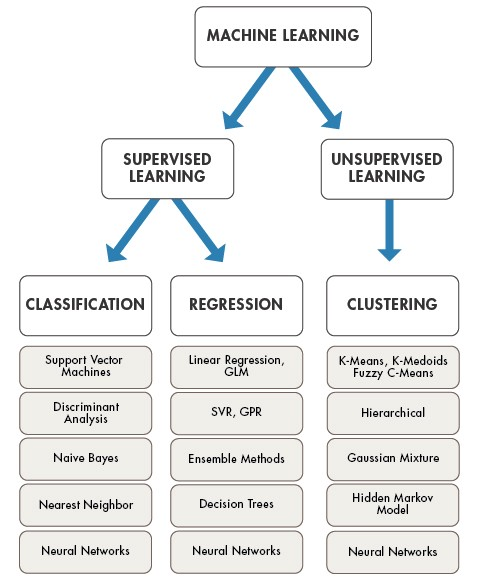

In [7]:
from IPython import display
display.Image("C:/Users/pablo/OneDrive/Documentos/DataScience/Interview Questions/ML algorithms.jpeg")

# I´m comfortable with
# K nearest neighbours: Classification
# Naive Bayes: Classification
# ANN:  Classification, regression, clustering
# SVM:  Classification
# Decission trees: Regression
# HMM: Clustering

In this Notebook and the next ones we are going to use sklearn for the next ml algorithms:

**Classification**
 * K nearest neighbors (KNN)
 * Support Vector Machine (SVM)
 * Naive Bayes
 
**Regression**
 * Linear regression
 * Generalized Linear Models (GLM)
 * Decission trees
 * Random forest
 
**Clustering**
 * K-means
 * Neural networks 

**Dimensionality reduction**
 * Principal Component Analysis (PCA)
 * Singular Value Decomposition
 * Linear Discriminant Analysis
 
However, some of this algorithms can be applyed for more than one work. For example, SVM can be used for both classification and regression. And neural networks are really versatile as they can be used for classification, regression and clustering.

# Classification

## K nearest neighbors

Knn is based on the latin proverb *pares cum paribus facillime congregantur*. It is probably one of my favourite ml algorithms due to it´s theoretical simplicity and high performance.

The K-nearest neighbors (KNN) algorithm is a type of supervised machine learning algorithms. **KNN is extremely easy to implement in its most basic form, and yet performs quite complex classification tasks**. It is a lazy learning algorithm since it doesn't have a specialized training phase. Rather, it uses all of the data for training while classifying a new data point or instance. KNN is a non-parametric learning algorithm, which means that it doesn't assume anything about the underlying data. This is an extremely useful feature since most of the real world data doesn't really follow any theoretical assumption e.g. linear-separability, uniform distribution, etc.

### Theory

The intuition behind the KNN algorithm is one of the simplest of all the supervised machine learning algorithms. **It simply calculates the distance of a new data point to all other training data points**. The distance can be of any type e.g Euclidean or Manhattan etc. **It then selects the K-nearest data points, where K can be any integer**. Finally it assigns the data point to the class to which the majority of the K data points belong.

#### Pros

 * It is extremely easy to implement
 * As said earlier, it is lazy learning algorithm and therefore requires no training prior to making real time predictions. This makes the KNN algorithm much faster than other algorithms that require training e.g SVM, linear regression, etc.
 * Since the algorithm requires no training before making predictions, new data can be added seamlessly.
 * There are only two parameters required to implement KNN i.e. the value of K and the distance function (e.g. Euclidean or Manhattan etc.)

#### Cons

 * The KNN algorithm doesn't work well with high dimensional data because with large number of dimensions, it becomes difficult for the algorithm to calculate distance in each dimension.
 * The KNN algorithm has a high prediction cost for large datasets. This is because in large datasets the cost of calculating distance between new point and each existing point becomes higher.
 * Finally, the KNN algorithm doesn't work well with categorical features since it is difficult to find the distance between dimensions with categorical features.
 
https://stackabuse.com/k-nearest-neighbors-algorithm-in-python-and-scikit-learn/


### Implementing KNN algorithm with Scikit-Learn

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sb

### Importing the dataset

In [2]:
url= "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"

# Assign column names to the dataset
names = ['sepal-lenght', 'sepal-width', 'petal-length', 'petal-width', 'Class']

# Read dataset to pandas dataframe
dataset = pd.read_csv(url, names=names)

In [3]:
dataset.head()

,sepal-lenght,sepal-width,petal-length,petal-width,Class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


### Preprocessing

The next step is to split our dataset into it´s attributes and labels.

In [4]:
X = dataset.iloc [:, :-1].values
y = dataset.iloc[:, 4].values

## Train Test Split

To **avoid over-fitting**, we will divide our datset into training and test splits, which gives us a better idea as to how our algorithm performed during the testing phase. This way our algorithm is tested on un-seen data, as it would be in a production application.

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

### Feature Scaling

Before making any actual predictions, it is always a good practice to scale the features so that all of them can be uniformly evaluated. Wikipedia explains the reasoning pretty well:

```
Since the range of values of raw data varies widely, in some machine learning algorithms, objective functions will not work properly without normalization. For example, the majority of classifiers calculate the distance between two points by the Euclidean distance. If one of the features has a broad range of values, the distance will be governed by this particular feature. Therefore, the range of all features should be normalized so that each feature contributes approximately proportionately to the final distance.
```


The Machine Learning algorithms that require the feature scaling are mostly KNN (K-Nearest Neighbours), Neural Networks, Linear Regression, and Logistic Regression.

The machine learning algorithms that do not require feature scaling is mostly non-linear ML algorithms such as Decision trees, Random Forest, AdaBoost, Naïve Bayes, etc.

In [17]:
# The following script performs scaling:

from sklearn.preprocessing import StandardScaler

scaler= StandardScaler()
scaler.fit(X_train) # We adjust the scaling to train values

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)


### Training and Predictions

In [18]:
from sklearn.neighbors import KNeighborsClassifier # Import the KNeighborsClassifier class from the sklearn.neighbors library.
classifier = KNeighborsClassifier(n_neighbors=5) # This class is initialized with one parameter, i.e. n_neigbours. 
classifier.fit(X_train, y_train)

# The final step is to make predictions on our test data. To do so, execute the following script:
y_pred = classifier.predict(X_test)

### Evaluating the algorithm

For evaluating an algorithm, **confusion matrix**, **precision**, **recall** and **f1 score** are the most commonly used metrics. The confusion_matrix and classification_report methods of the sklearn.metrics can be used to calculate these metrics. Take a look at the following script:

In [19]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[10  0  0]
 [ 0 10  0]
 [ 0  1  9]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       0.91      1.00      0.95        10
 Iris-virginica       1.00      0.90      0.95        10

       accuracy                           0.97        30
      macro avg       0.97      0.97      0.97        30
   weighted avg       0.97      0.97      0.97        30



### Comparing Error Rate with the K Value

In the training and prediction section we said that there is no way to know beforehand which value of K that yields the best results in the first go. We randomly chose 5 as the K value and it just happen to result in 100% accuracy.

One way to help you find the best value of K is to **plot the graph of K value and the corresponding error rate for the dataset**.

In this section, we will plot the mean error for the predicted values of test set for all the K values between 1 and 40.

To do so, let's first calculate the mean of error for all the predicted values where K ranges from 1 and 40. Execute the following script:

In [21]:
error = []

# Calculating error for K values between 1 and 40

for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))
    

The above script executes a loop from 1 to 40. In each iteration the mean error for predicted values of test set is calculated and the result is appended to the error list.

The next step is to plot the error values against K values. Execute the following script to create the plot

Text(0, 0.5, 'Mean Error')

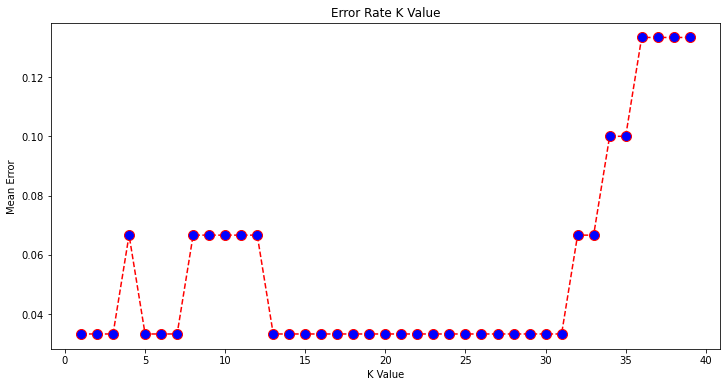

In [22]:
plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')

## Support Vector Machine

In this case we are going to use the DS approach:
 * Business Understanding
 * Analytic approach: We are going to predict the wine class. This is a classification problem. SVM, KNN, Naive Bayes, NN are all good options.
 * Data requirements: We need the data to be consistent (no NA), and also scaled. 
 * Data collection
 * Data understanding: Check for NA. Plot variables. 
 * Data preparation
 * Modeling
 * Evaluation
 * Deployment
 * Feedback

In [8]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data"

names = ['Name', 'Alcohol', 'Malic acid', 'Ash', 'Alcalinity of ash', 'Magnesium', 'Total phenols', 'Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanins', 'Color intensity', 'Hue', 'OD280/OD315 of diluted wines', 'Proline']   

# Read dataset to pandas dataframe
dataset = pd.read_csv(url, names=names)

In [9]:
dataset.head()

,Name,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


### Check for NA

We plot the NA values. As we can see, we will not need to fill any variable, as they are complete. 

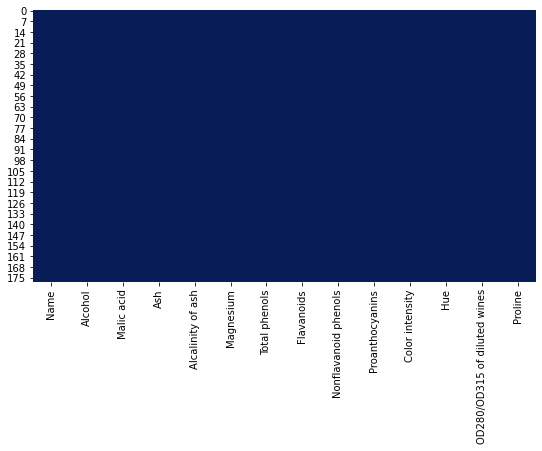

In [20]:
fig, ax = plt.subplots(figsize=(9,5))
sb.heatmap(dataset.isnull(), cbar=False, cmap="YlGnBu_r")
plt.show()

### Seaborn countplots

for categorical colummns

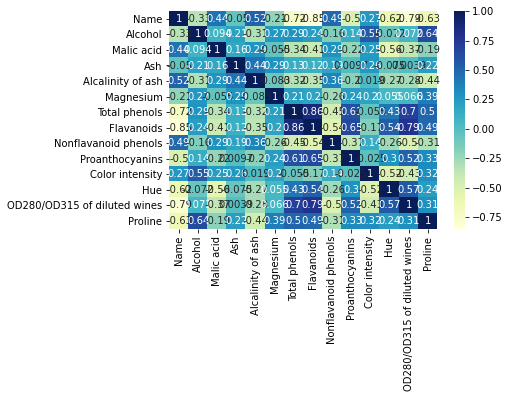

In [11]:
dataplot = sb.heatmap(dataset.corr(), cmap="YlGnBu", annot=True)



### Train Test Split

In [12]:
# Split in variables and names
X = dataset.iloc[:, 1:14]
y = dataset.iloc[:, 0]

# Select variables of interest
X = X[['Alcohol', 'Malic acid', 'Alcalinity of ash', 'Total phenols', 'Flavanoids', 'Hue', 'OD280/OD315 of diluted wines']]

# Split in train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

### Scaling the data

In [13]:
# The following script performs scaling:

from sklearn.preprocessing import StandardScaler

scaler= StandardScaler()
scaler.fit(X_train) # We adjust the scaling to train values

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

### Modeling

In [16]:
from sklearn.svm import SVC #SVC is the classifier. We can also do from sklearn.svm import SVR, which is for regression

classifier = SVC()
classifier.fit(X_train, y_train)
               
# The final step is to make predictions on our test data. To do so, execute the following script:
y_pred = classifier.predict(X_test)


### Evaluation

In [18]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[10  1  0]
 [ 0 14  0]
 [ 0  0 11]]
              precision    recall  f1-score   support

           1       1.00      0.91      0.95        11
           2       0.93      1.00      0.97        14
           3       1.00      1.00      1.00        11

    accuracy                           0.97        36
   macro avg       0.98      0.97      0.97        36
weighted avg       0.97      0.97      0.97        36



# Naive Bayes

In [23]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data"

names =  ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num']  

dataset = pd.read_csv(url, names=names)

In [24]:
dataset.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


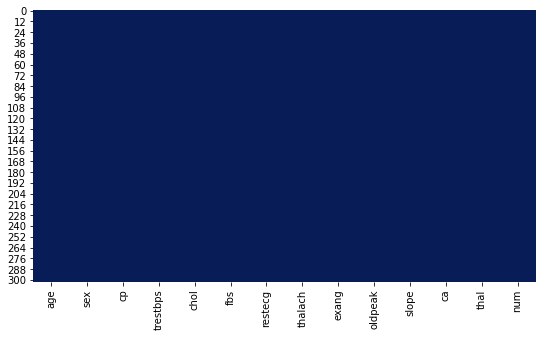

In [35]:
fig, ax = plt.subplots(figsize=(9,5))
sb.heatmap(dataset.isnull(), cbar=False, cmap="YlGnBu_r")
plt.show()

In [39]:
X = dataset.iloc[:, 0:12]
y = dataset.iloc[:, 13]

In [40]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

### Modeling

In [48]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
y_pred = gnb.fit(X_train, y_train).predict(X_test)

ValueError: could not convert string to float: '?'